In [246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from math import sqrt
from joblib import dump, load

In [247]:
# Instancia o dataframe

df_airbnb = pd.read_csv('airbnb.csv', index_col='id', engine='python', sep =',', encoding="utf-8")

In [248]:
# Calcula métricas de desempenho do regressor.

def get_metrics(y_test, y_pred):  

    rmse = round(sqrt(mean_squared_error(y_test, y_pred)),4)
    r2 = round(r2_score(y_test, y_pred),4)

    return rmse, r2

In [249]:
# Define semente aleatória

random_state=1223614

In [250]:
# Vamos dividir da seguinte forma: 90% para treino e 10% para teste. 
# Os registros deverão ser embaralhados.

X = df_airbnb.drop(columns=['price'])
y = df_airbnb['price']

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.1, random_state=random_state)

print("Quantidade de registros de X_train: " + str(X_train.shape[0]))
print("Quantidade de registros de y_train: " + str(y_train.shape[0]))
print("Quantidade de registros de X_test: " + str(X_test.shape[0]))
print("Quantidade de registros de y_test: " + str(y_test.shape[0]))

Quantidade de registros de X_train: 6300
Quantidade de registros de y_train: 6300
Quantidade de registros de X_test: 700
Quantidade de registros de y_test: 700


In [251]:
# Carrega o modelo treinado salvo previamente
regr = load('regressor.joblib')

In [252]:
# Avalia a performance do modelo treinado, usando a massa reservada para testes.
# E obtém as métricas de desempenho - o quanto nosso modelo acertou?
# RMSE (Raiz do erro médio quadrático - Quanto mais próximo a 0.0000, melhor)
# R² (Coeficiente de determinação - Quanto mais  próximo a 1.0000, melhor)

y_pred = regr.predict(X_test)
rmse, r2 = get_metrics(y_test, y_pred)
comparacao = []
comparacao.append(('Regressor Otimizado', rmse, r2))
print('RMSE: ',rmse)
print('R²: ',r2)

RMSE:  93.1471
R²:  0.4603


In [253]:
# Comparando os resultados com o LinearRegressor, o nosso algoritmo de base.

linear_regr = LinearRegression()
linear_regr.fit(X_train, y_train)
y_pred_baseline = linear_regr.predict(X_test)
rmse, r2 = get_metrics(y_test, y_pred_baseline)
comparacao.append(('Regressor Básico', rmse, r2))
print('RMSE: ',rmse)
print('R²: ',r2)

RMSE:  102.0199
R²:  0.3525


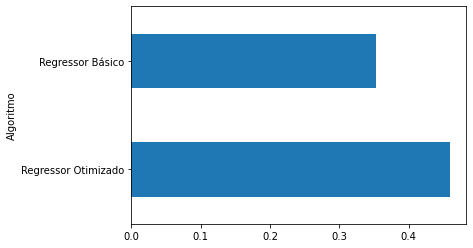

In [254]:
df_comparacao = pd.DataFrame(data=comparacao, columns=['Algoritmo', 'RMSE', 'R2'])
df_comparacao.set_index('Algoritmo', inplace=True)
df_comparacao.sort_values('R2', ascending=False, inplace=True)
df_comparacao['R2'].plot.barh()

In [255]:
# Exemplo de visualização de dados
results = pd.DataFrame(np.array(y_test).flatten(),columns=['Realizado'])
results['Previsto'] = np.array(y_pred)
results['Id'] = X_test.index
results = results[['Id', 'Realizado', 'Previsto']]
results

,Id,Realizado,Previsto
0,10711296,101.0,154.230446
1,13257826,252.0,409.395275
2,5172574,491.0,352.183161
3,9205886,231.0,227.540391
4,846716,243.0,146.322296
...,...,...,...
695,29512201,382.0,265.703430
696,849887,151.0,184.219114
697,30002641,92.0,160.098195
698,32544922,202.0,153.158725


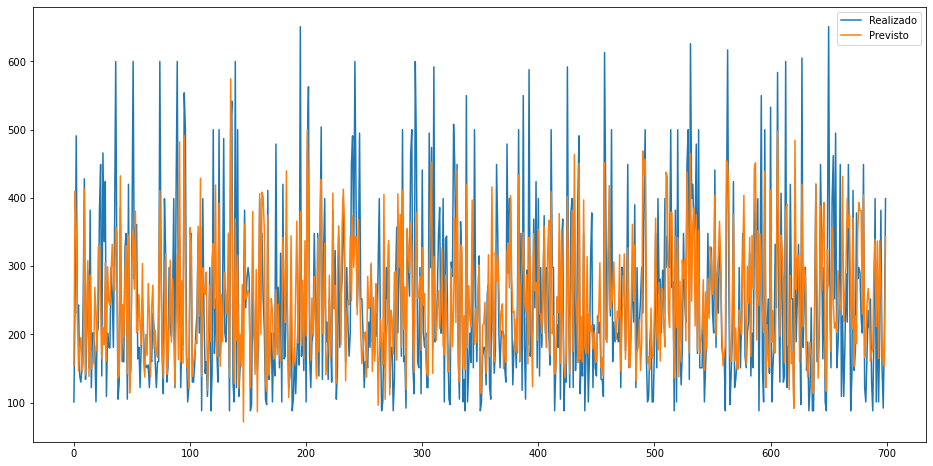

In [256]:
results[['Realizado', 'Previsto']][:].plot(kind='line', figsize=(16,8))

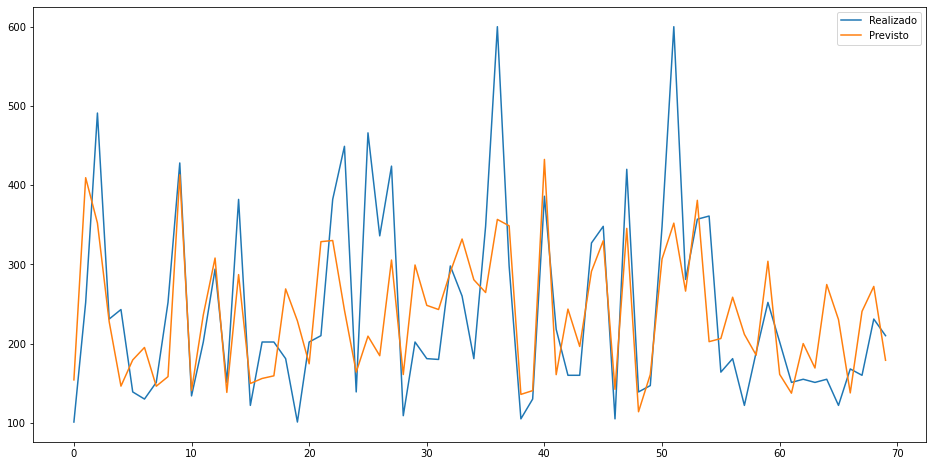

In [257]:
results[['Realizado', 'Previsto']][0:70].plot(kind='line', figsize=(16,8))

In [258]:
results['Diferença'] = results['Realizado'] - results['Previsto']
results

,Id,Realizado,Previsto,Diferença
0,10711296,101.0,154.230446,-53.230446
1,13257826,252.0,409.395275,-157.395275
2,5172574,491.0,352.183161,138.816839
3,9205886,231.0,227.540391,3.459609
4,846716,243.0,146.322296,96.677704
...,...,...,...,...
695,29512201,382.0,265.703430,116.296570
696,849887,151.0,184.219114,-33.219114
697,30002641,92.0,160.098195,-68.098195
698,32544922,202.0,153.158725,48.841275


In [259]:
results = results[['Id', 'Diferença']]
results.set_index('Id', inplace = True)
results.query('Diferença < 0', inplace = True)

In [260]:
results

,Diferença
Id,
10711296,-53.230446
13257826,-157.395275
14267593,-40.370298
26275626,-65.117737
51703,-6.656097
...,...
12846452,-93.759340
22486276,-63.368090
16552375,-135.427251


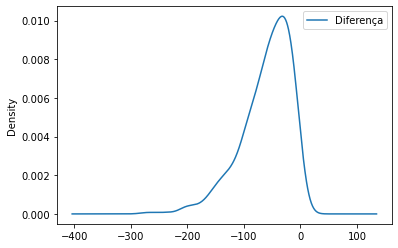

In [271]:
results.plot.density()

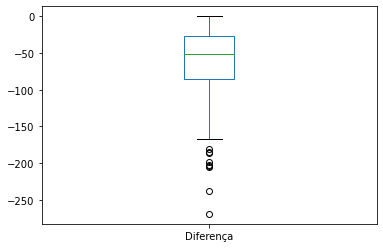

In [272]:
results.plot.box()

In [273]:
results.quantile([0, 0.25, 0.5, 0.75, 1])

,Diferença
0.00,-269.099985
0.25,-85.210828
0.50,-51.030113
0.75,-27.347038
1.00,-0.054018


In [274]:
results.mean()

Diferença   -60.637134
dtype: float64

In [275]:
results.median()

Diferença   -51.030113
dtype: float64